
#O consumo de Energia elétrica no Rio de Janeiro

Nome: Gustavo Felicidade da Costa
DRE: 118171109

##UFRJ Analytica - Processo Seletivo 2023


O consumo de energia elétrica é um tema relevante para entendermos
a infraestrutura e as necessidades energéticas do Rio de Janeiro.
Com a crescente demanda por energia elétrica nas últimas décadas,
é importante analisarmos como esse consumo evoluiu ao longo do tempo.
A partir dos dados disponibilizados pela Base dos Dados em https://www.data.rio/, é possível
realizar uma análise exploratória que permita compreender o consumo
de energia elétrica na cidade do Rio de Janeiro.


# Dataset

Nossos dados foram extraídos do datario.com

Os seguintes arquivos .csv são filtrados pela chave 'Elétrica' 
no contexto do Município do Rio de Janeiro:
    
    1 Tabela 1686 - Consumo total mensal de energia elétrica, segundo classe de serviço - Município do Rio de Janeiro - 2019
    url = https://www.data.rio/documents/7c4d6a17d1c94ccf8c652488318d691b/about

    2 Tabela 1687 - Total mensal de unidades consumidoras de energia elétrica, por classe de consumo, no Município do Rio de Janeiro em 2019
    url = https://www.data.rio/documents/c89710cd395b495a999ac84399fcc884/about



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import csv
import pandas as pd
import numpy as np
import logging
import time
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots


from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, f1_score


# Configurando Log

In [3]:

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Tratamento dos Dados

In [4]:
# Ler a página "2002" do arquivo
# Tabela 1686 - Consumo total mensal de energia elétrica, segundo classe de
# serviço - Município do Rio de Janeiro - 2019
df1 = pd.read_excel(
    r"/content/drive/MyDrive/Colab Notebooks/1686.xls",
    sheet_name="2002", header=6, skiprows=2, nrows=12)

# Ler a página "T 2257" do arquivo
# "Tabela 2257 - Consumo total, médio anual, mensal e diário
# de energia elétrica por habitante no Município do Rio de Janeiro
# entre  1980-2019"
df2 = pd.read_excel(
    r"/content/drive/MyDrive/Colab Notebooks/2257.xls",
        sheet_name="T 2257", header=6, skiprows=1, nrows=40)

# Imprimir os DataFrames
# print("Tabela 2257 - Consumo total, médio anual, mensal e diário \n de
# energia elétrica por habitante no Município do Rio de Janeiro entre  1980-2019")
# print(df2)


Extraindo Dataframe: Como o arquivo .xls vem com informações 
além da tabela precisamos extrair o dataframe antes de analisá-los.


A função collect_dataframes fará esta extração retornando o dataframe armazenado em lista.

Note que o laço de repetição itera sobre os anos e assim obtemos os dataframes de cada aba:


In [5]:
def collect_dataframes(file_path):
    # criar uma lista vazia para armazenar os dataframes de cada ano
    df_list = []
    # percorrer os anos de 2002 a 2019
    for year in range(2002, 2020):
        # criar o nome da sheet com base no ano
        sheet_name = str(year)
        # ler o dataframe da sheet especificada
        df = pd.read_excel(file_path, index_col=0, sheet_name=sheet_name, header=6, skiprows=2, nrows=12)
        # adicionar o dataframe à lista
        df_list.append(df)
    # retornar a lista de dataframes
    return df_list


# Usaremos a função collect_dataframes para extrair as tabelas referentes
# ao consumo mensal de energia elétrica, segundo classe de serviço no 
# Municipio do Rio de Janeiro - 2002 até 2019


In [6]:
file_path = r"/content/drive/MyDrive/Colab Notebooks/1686.xls"
df_list = collect_dataframes(file_path)
print(type(df_list))

# Extração de amostra do ano de 2002:
df_2002 = df_list[0]
print(type(df_2002))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [7]:

# logger.info(f"df_list: {df_list}")
#
# logger.info(f"df_2002: {df_2002}")


Vamos selecionar a coluna referente ao total de consumo por mês;

Para isso a função  print_second_column é definida como:

In [8]:
def print_second_column(df_list):
    # percorrer cada dataframe na lista
    for df in df_list:
        # selecionar a segunda coluna e imprimir
        print(df.iloc[:, ])

vejamos a coluna referente ao total de consumo mensal - MWh -  ao longos anos de 2002 até 2019:

In [9]:
# print_second_column(df_list)


# A Função Consumo Mensal 
Extração das colunas por consumo ao longo dos anos.

In [32]:
# Tabela 1686
# Tabela 1686 - Consumo mensal de energia elétrica, segundo classe de serviço -
# Municipio do Rio de Janeiro - 2002 a 2019
def consumo_mensal(df_list):
   
    # percorrer cada dataframe na lista e extraindo 
    # colunas individualmente

    # Coluna Consumo Total
    consumo_total = []
    # Coluna Consumo Residencial
    consumo_residencial = []
    # Coluna Consumo Insdutrial
    consumo_industrial = []    
    # Coluna Consumo Comercial
    consumo_comercial = []
    # Coluna Consumo Rural
    consumo_rural = []
    # Coluna Consumo Poder Público
    consumo_poder_publico = []
    # Coluna Consumo Residencial
    consumo_residencial = []
    # Coluna Consumo Iluminação Pública
    consumo_iluminacao_publica = []
    # Coluna Consumo Serv. público
    consumo_serv_publico = []
    # Coluna Consumo Próprio
    consumo_consumo_proprio = []

    res = []


    for df in df_list:
        # Coluna Consumo Total
        col_consumo_total = df.iloc[:, 0]
        # Coluna Consumo Residencial
        col_consumo_residencial = df.iloc[:, 1]
        # Coluna Consumo Insdutrial
        col_consumo_industrial = df.iloc[:, 2]
        # Coluna Consumo Comercial
        col_consumo_comercial = df.iloc[:, 3]
        # Coluna Consumo Rural
        col_consumo_rural = df.iloc[:, 4]
        # Coluna Consumo Poder Público
        col_consumo_poder_publico = df.iloc[:, 5]        
        # Coluna Consumo Iluminação Pública
        col_consumo_iluminacao_publica = df.iloc[:, 6]
        # Coluna Consumo Serv. público
        col_consumo_serv_publico = df.iloc[:, 7]
        # Coluna Consumo Próprio
        col_consumo_consumo_proprio = df.iloc[:, 8]

        # selecionar a terceira coluna e imprimir     
        col2 = df.iloc[:, 1]      

        # print(f"type: {type(col2)} col2: {col2}")
        
        res.append(col2)
        # Coluna Consumo Total
        consumo_total.append(col_consumo_total)
        # Coluna Consumo Residencial
        consumo_residencial.append(col_consumo_residencial)
        # Coluna Consumo Insdutrial
        consumo_industrial.append(col_consumo_industrial)
        # Coluna Consumo Comercial
        consumo_comercial.append(col_consumo_comercial)
        # Coluna Consumo Rural
        consumo_rural.append(col_consumo_comercial)
        # Coluna Consumo Poder Público
        consumo_poder_publico.append(col_consumo_poder_publico)

        # Coluna Consumo Iluminação Pública
        consumo_iluminacao_publica.append(col_consumo_iluminacao_publica)
        # Coluna Consumo Serv. público
        consumo_serv_publico.append(col_consumo_serv_publico)
        # Coluna Consumo Próprio
        consumo_consumo_proprio.append(col_consumo_consumo_proprio)
        
    return res, consumo_total, consumo_residencial, consumo_industrial, consumo_comercial, consumo_rural, consumo_poder_publico, consumo_iluminacao_publica,  consumo_serv_publico, consumo_consumo_proprio



res, consumo_total, consumo_residencial, consumo_industrial, consumo_comercial, consumo_rural, consumo_poder_publico, consumo_iluminacao_publica,  consumo_serv_publico, consumo_consumo_proprio = consumo_mensal(df_list)
print(len(res))
print(type(res[4]))
# print(res)
# print(consumo_total)
# print(consumo_residencial)
# print(consumo_industrial)
print(consumo_comercial)
# print(consumo_rural)
# print(consumo_poder_publico)
# print(consumo_iluminacao_publica)
# print(consumo_iluminacao_publica)
# print(consumo_consumo_proprio)



18
<class 'pandas.core.series.Series'>
[Jan    355558.115
Fev    375847.478
Mar    353384.172
Abr    377707.960
Mai    380131.273
Jun    347477.148
Jul    304202.722
Ago    334906.852
Set    333853.216
Out    348996.064
Nov    379143.649
Dez    381306.269
Name: 4272514.9180000005, dtype: float64, Total 
Jan    397582.488
Fev    407964.692
Mar    399592.607
Abr    362924.074
Mai    352523.499
Jun    334665.858
Jul    320611.398
Ago    330388.703
Set    305300.470
Out    346198.498
Nov    361053.822
Dez    399530.148
Name: 4318336.257, dtype: float64, Total 
Jan    357271.703
Fev    385037.707
Mar    378958.484
Abr    389511.665
Mai    365804.573
Jun    327034.594
Jul    341543.826
Ago    325547.886
Set    348299.370
Out    359817.666
Nov    364534.766
Dez    400093.025
Name: 4343455.265, dtype: float64, Total 
Jan    400600.717
Fev    374154.979
Mar    409253.753
Abr    427468.471
Mai    388272.326
Jun    387805.618
Jul    353251.074
Ago    352750.479
Set    388604.548
Out    377327.611

In [11]:
# selecionar a coluna "Residencial" de todos os dataframes na lista
residencial_list = [df.iloc[:, 2] for df in df_list]
print("residencial_list")
print(type(residencial_list))




residencial_list
<class 'list'>


# Na Tabela 2257 - Consumo total, médio anual, mensal
# e diário de energia elétrica por habitante no Município
#  do Rio de Janeiro entre 1980 e 2019: 


In [12]:

populacao = df2.iloc[:, 5]
ano =  df2.iloc[:, 0]
ano_populacao =  df2.iloc[:, 0::5]

consumo_total_MWh =  ''


print(f"Ano e populacao \n {ano_populacao}")
# print(populacao)


Ano e populacao 
     Unnamed: 0    Unnamed: 5
0         1980  5.090790e+06
1         1981  5.125066e+06
2         1982  5.159573e+06
3         1983  5.194312e+06
4         1984  5.229285e+06
5         1985  5.264493e+06
6         1986  5.299939e+06
7         1987  5.335623e+06
8         1988  5.371547e+06
9         1989  5.407713e+06
10        1990  5.444123e+06
11        1991  5.480778e+06
12        1992  5.521452e+06
13        1993  5.562429e+06
14        1994  5.603709e+06
15        1995  5.645295e+06
16        1996  5.687191e+06
17        1997  5.729397e+06
18        1998  5.771916e+06
19        1999  5.814751e+06
20        2000  5.857904e+06
21        2001  5.897485e+06
22        2002  5.937253e+06
23        2003  5.974081e+06
24        2004  6.051399e+06
25        2005  6.094183e+06
26        2006  6.136652e+06
27        2007  6.132342e+06
28        2008  6.161047e+06
29        2009  6.186710e+06
30        2010  6.320446e+06
31        2011  6.355949e+06
32        2012  6.390290e

# Formatação em dicionário

# Análise Exploratória dos Dados
def data_exploratory():
    ...d

Com o gráfico de consumo médio podemos analisar uma aumento considerável no consumo de energia no Rio de Janeiro

In [37]:

# Gráfico de linha para população
fig1 = go.Figure()  # Cria um canva 
# Add gráfico de dispersão da coluna população
fig1.add_trace(go.Scatter(x=df2.iloc[:, 0], y=df2.iloc[:, 5], name='População'))

# Gráfico de barras para consumo residencial
fig2 = go.Figure()  # Cria um canva
# Add o gráfico de barras  referentes aos anos de 2002 a 2020
fig2.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=[df.iloc[:, 1].sum() for df in df_list], name='Consumo residencial'))

# Criar um mesmo gráfico com os dois plots
fig = make_subplots(rows=1, cols=2, shared_xaxes=True)
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

# Configurar o layout
fig.update_layout(title='População e consumo residencial do Rio de Janeiro (2002-2019)',
                  xaxis_title='Ano',
                  yaxis_title='População / Consumo residencial (MWh)')

# Mostrar o gráfico
fig.show()

Abaixo alguns sumários visuais sobre o consumo de energia elétrica no Rio de Janeiro:



In [41]:
# Configurações comuns para todos os gráficos
title = 'Consumo de energia elétrica no Rio de Janeiro (2002-2019)'
x_title = 'Ano'
y_title = 'Consumo (MWh)'

# Gráfico de linha para consumo total
fig1 = go.Figure()
for i, col in enumerate(consumo_total):
    fig1.add_trace(go.Scatter(x=[str(year) for year in range(2002, 2020)], y=col, name=f'{df_list[i].iloc[0,1]}'))

fig1.update_layout(title=title, xaxis_title=x_title, yaxis_title=y_title)
fig1.show()

# Gráfico de barras para consumo residencial
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=[df.iloc[:, 1].sum() for df in df_list], name='Consumo residencial'))

fig2.update_layout(title=title, xaxis_title=x_title, yaxis_title=y_title)
fig2.show()

# Gráfico de barras empilhadas para consumo por setor
fig3 = go.Figure()
fig3.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=consumo_residencial, name='Residencial'))
fig3.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=consumo_industrial, name='Industrial'))
fig3.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=consumo_comercial, name='Comercial'))
fig3.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=consumo_rural, name='Rural'))
fig3.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=consumo_poder_publico, name='Poder Público'))
fig3.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=consumo_iluminacao_publica, name='Iluminação Pública'))
fig3.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=consumo_serv_publico, name='Serv. Público'))
fig3.add_trace(go.Bar(x=[str(year) for year in range(2002, 2020)], y=consumo_consumo_proprio, name='Consumo Próprio'))

fig3.update_layout(barmode='stack', title=title, xaxis_title=x_title, yaxis_title=y_title)
fig3.show()

# Gráfico de linha para consumo residencial e industrial
fig4 = go.Figure()
for i, col in enumerate([consumo_residencial, consumo_industrial]):
    fig4.add_trace(go.Scatter

(x=[str(year) for year in range(2002, 2020)], y=col, name=['Residencial', 'Industrial'][i], mode='lines+markers'))

fig4.update_layout(title=title, xaxis_title=x_title, yaxis_title=y_title)
fig4.show()

## Modelo LSTM


In [15]:

def prepare_data(res):
    # Combine todas as séries da lista em um dataframe
    df = pd.concat(res, axis=1)

    # Transponha o dataframe para que cada linha represente uma residência e cada coluna uma etapa de tempo
    df = df.T

    # Converte o dataframe em um array numpy
    data = df.values

    # Normaliza os dados
    data = (data - np.mean(data)) / np.std(data)

    # Divida os dados em sequências de entrada (X) e saída (y)
    X, y = data[:, :-1], data[:, -1]
    print(type(X),len(X), type(y),len(y))
    # Reformule o X para ser tridimensional (amostras, intervalos de tempo, recursos)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    return X, y

Função para criar nosso modelo LSTM:

In [16]:
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True)
    return model

Na medida que aumentamos o numero de epoch menor é a nossa perda:


In [17]:
# def train_model(X_train, y_train, X_val, y_val):
#     # Define and train the LSTM model
#     model = Sequential()
#     model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')

#     # Train the model with a validation set
#     history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

#     return model, history

def train_model(X_train, y_train, X_val, y_val):
    model = create_model(input_shape=X_train.shape[1:])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_val, y_val))
    return model, history




In [18]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    # plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

<class 'numpy.ndarray'> 18 <class 'numpy.ndarray'> 18
Epoch 1/100
5/5 [==============================] - 0s 104ms/step - loss: 0.4488 - val_loss: 0.4401
Epoch 2/100
5/5 [==============================] - 0s 89ms/step - loss: 0.2722 - val_loss: 0.1044
Epoch 3/100
5/5 [==============================] - 0s 84ms/step - loss: 0.2933 - val_loss: 0.0133
Epoch 4/100
5/5 [==============================] - 0s 96ms/step - loss: 0.2206 - val_loss: 0.1038
Epoch 5/100
5/5 [==============================] - 0s 91ms/step - loss: 0.1946 - val_loss: 0.1346
Epoch 6/100
5/5 [==============================] - 0s 94ms/step - loss: 0.1931 - val_loss: 0.1056
Epoch 7/100
5/5 [==============================] - 0s 94ms/step - loss: 0.1703 - val_loss: 0.0565
Epoch 8/100
5/5 [==============================] - 0s 85ms/step - loss: 0.1807 - val_loss: 0.0363
Epoch 9/100
5/5 [==============================] - 0s 106ms/step - loss: 0.1696 - val_loss: 0.0516
Epoch 10/100
5/5 [==============================] - 0s 92ms/st

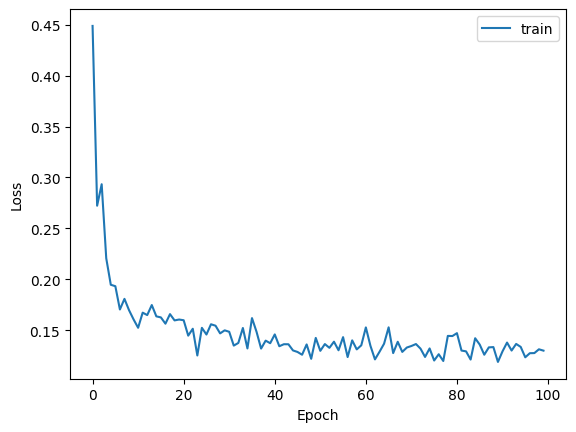

In [43]:

# Exemplo de uso
# res   
# X, y = prepare_data(res)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)


# consumo_total
X, y = prepare_data(consumo_total)  # list of pandas series
X_train, y_train = X[:18], y[:18]
X_val, y_val = X[10:12], y[10:12]
X_test, y_test = X[12:], y[12:]
model, history = train_model(X_train, y_train, X_val, y_val)
plot_loss(history)


#consumo_industrial
# X, y = prepare_data(consumo_residencial)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)

# X, y = prepare_data(consumo_industrial)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)


# consumo_comercial
# X, y = prepare_data(consumo_comercial)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)


# consumo_poder_publico
# X, y = prepare_data(consumo_poder_publico)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)


# consumo_iluminacao_publica
# X, y = prepare_data(consumo_iluminacao_publica)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)


# consumo_serv_publico
# X, y = prepare_data(consumo_serv_publico)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)


# consumo_consumo_proprio
# X, y = prepare_data(consumo_consumo_proprio)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)


# consumo_rural
# X, y = prepare_data(consumo_rural)  # list of pandas series
# X_train, y_train = X[:18], y[:18]
# X_val, y_val = X[10:12], y[10:12]
# X_test, y_test = X[12:], y[12:]
# model, history = train_model(X_train, y_train, X_val, y_val)
# plot_loss(history)

In [44]:

# Calcula a precisão (accuracy) para os dados de teste
def calculate_accuracy(y_true, y_pred):
    y_pred = np.round(y_pred)
    return accuracy_score(y_true, y_pred)



In [45]:
# Calcula a medida F1 (F1-score) para os dados de teste
def calculate_f1_score(y_true, y_pred):
    y_pred = np.round(y_pred)
    return f1_score(y_true, y_pred)

In [46]:
import numpy as np
from sklearn.metrics import f1_score

# set threshold value
threshold = 0.5

# converte y_test para binário
y_test_binary = np.where(y_test >= threshold, 1, 0)

# fazer previsões
y_pred = model.predict(X_test)

# converte y_pred para binário
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# calcula precisão e pontuação f1
accuracy = calculate_accuracy(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# imprimir os resultados
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.4f}".format(f1))


1/1 [==============================] - 0s 46ms/step
Accuracy: 66.67%
F1 Score: 0.8000


Imprime os resultados

In [47]:
import plotly.graph_objs as go
import numpy as np
from sklearn.metrics import f1_score



# create line chart trace for F1 score
trace1 = go.Scatter(x=["F1 Score"], y=[f1], mode="lines+markers", name="F1 Score")

# create layout
layout = go.Layout(title="Model Evaluation", yaxis=dict(title="Score"))

# create figure
fig = go.Figure(data=[trace1], layout=layout)

# show figure
fig.show()


In [48]:
# create line chart trace for accuracy
trace1 = go.Scatter(x=[0], y=[accuracy], mode="lines", name="Accuracy")

# create layout
layout = go.Layout(title="Model Evaluation", yaxis=dict(title="Score", range=[0, 1]))

# create figure
fig = go.Figure(data=[trace1], layout=layout)

# show figure
fig.show()


In [49]:
# create trace for actual consumption data
trace1 = go.Scatter(x=np.arange(y_test.shape[0]), y=y_test, mode="lines", name="Actual")

# create trace for predicted consumption data
trace2 = go.Scatter(x=np.arange(y_pred.shape[0]), y=y_pred, mode="lines", name="Predicted")

# create layout
layout = go.Layout(title="Actual vs Predicted Consumption", xaxis=dict(title="Time"), yaxis=dict(title="Consumption"))

# create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# show figure
fig.show()


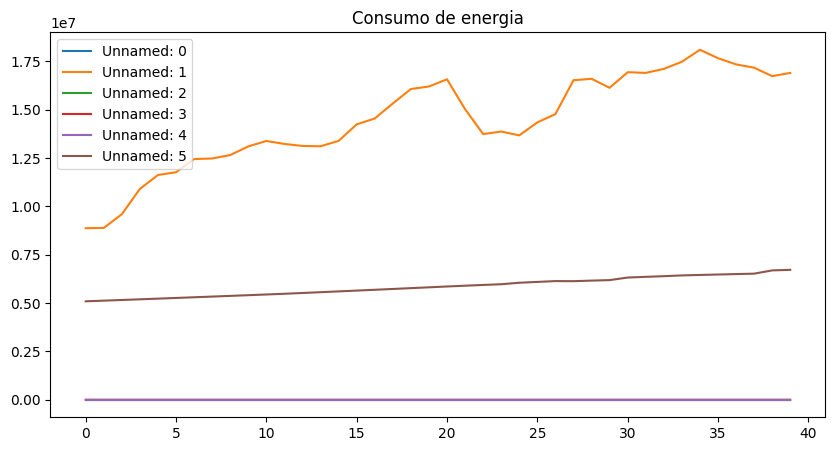

In [50]:
#Plotando o gráfico
graph = df2.plot(figsize=(10, 5), title="Consumo de energia")

In [51]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape(y_pred.shape[0],)
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test, name='Actual', mode='lines'))
    fig.add_trace(go.Scatter(x=list(range(len(y_pred))), y=y_pred, name='Predicted', mode='lines'))
    fig.update_layout(title='Actual vs. Predicted', xaxis_title='Time', yaxis_title='Consumption')
    fig.show()


In [52]:
plot_predictions(model, X_test, y_test)


1/1 [==============================] - 0s 49ms/step


Os valores preditos  são as estimativas do consumo de energia elétrica para o período de teste (ou seja, os próximos 6 meses) com base nos dados históricos fornecidos ao modelo. Esses valores representam a saída (ou "y_pred") do modelo treinado.

In [53]:
y_pred = model.predict(X_test).flatten()
print(y_pred)


1/1 [==============================] - 0s 56ms/step
[0.8988702  0.7834528  0.68125856 0.5378159  0.51405454 0.5519121 ]


Os valores de MAE (Mean Absolute Error) e MSE (Mean Squared Error) são medidas de desempenho do modelo em relação aos dados de teste. O MAE é a média da diferença absoluta entre as previsões e os valores reais, enquanto o MSE é a média dos quadrados das diferenças entre as previsões e os valores reais. Essas métricas permitem avaliar o quão bem o modelo está ajustando aos dados e quanto erro ele está cometendo em relação aos valores reais. No seu caso, o modelo parece ter um bom desempenho, já que o valor de MAE é relativamente baixo (0.23) e o valor de MSE também é baixo (0.11).

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)


MAE: 0.27937311152287486
MSE: 0.09100862476744238
